In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# v2 removes the spectra and adds the minimization

# v3 looks at both joint and constrained wc-only chi2s and delta chi2s from the framework
# (also can potentially generate chi2s with python, since the toy data counts are saved)

# v4 looks at the minimization points for each toy

# v6 looks at the real data vs large scaling points, pretty much unrelated from previous versions

# v7 adds the chi2 map for real data at many different points

# v8 looks at joint and constrained chi2s for real data and toys, both with and without scaling signal in the constraining channels


# Loading Files

In [3]:
from scipy.special import erfinv, erfcinv
from scipy.stats import chi2
from scipy.stats import poisson

def get_significance(p_value):
    
    # probability of getting a more extreme result
    #p_value = 1. - chi2.cdf(chisquare, ndf)
    
    sigma = np.sqrt(2.) * erfcinv(p_value)
    
    #if printout: print(f"chi2/ndf: {chisquare}/{ndf}, p value: {p_value}, significance: {sigma} sigma")

    return sigma


In [4]:
with open("../TLee_Np0p/cv_and_cov_csv_outputs/lee_1_1/pred_newworld.csv") as f:
    line = f.readlines()[0]
    pred_1_1 = np.array([float(x) for x in line.split(",")[:-1]])

with open("../TLee_Np0p/cv_and_cov_csv_outputs/lee_1_1/pred_newworld.csv") as f:
    line = f.readlines()[0]
    pred_1_1 = np.array([float(x) for x in line.split(",")[:-1]])

with open("../TLee_Np0p/cv_and_cov_csv_outputs/lee_1_1/meas.csv") as f:
    line = f.readlines()[0]
    real_data = np.array([float(x) for x in line.split(",")[:-1]])

real_data_err = np.sqrt(real_data)

# Loading $\chi^2$ Information

## Joint, sig+constr channel scaling

In [5]:
with open('../TLee_Np0p/joint_chi2_and_chi2min_15_5_data_and_toys.txt', 'r') as f:
    lines = f.readlines()

data_counts = []
data_15_5_chi2_value = -999
data_15_5_min_Np_point = -999
data_15_5_min_0p_point = -999
data_15_5_chi2_min_value = -999
data_15_5_dchi2_value = -999

toy_15_5_counts = []
toy_15_5_15_5_chi2_values = []
toy_15_5_15_5_min_Np_points = []
toy_15_5_15_5_min_0p_points = []
toy_15_5_15_5_chi2_min_values = []
toy_15_5_15_5_dchi2_values = []

toy_1_1_counts = []
toy_1_1_15_5_chi2_values = []
toy_1_1_15_5_min_Np_points = []
toy_1_1_15_5_min_0p_points = []
toy_1_1_15_5_chi2_min_values = []
toy_1_1_15_5_dchi2_values = []

for line in lines:

    line_words = line.split()

    if line.startswith("data: "):
        data_counts = [int(x) for x in line.split()[1:]]
    elif line.startswith("data vs (15, 5) chi2 = "):
        data_15_5_chi2_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) minimization point = "): # (15, 5) toy #1 minimization point = (16.3321, 11.5484)
        data_15_5_min_Np_point = float(line.split()[-2][1:-1])
        data_15_5_min_0p_point = float(line.split()[-1][:-1])
    elif line.startswith("data vs (15, 5) chi2_min = "):
        data_15_5_chi2_min_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) dchi2 = "):
        data_15_5_dchi2_value = float(line.split()[-1])

    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:6]) == "fakedata:":
        toy_15_5_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        toy_15_5_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:6]) == "minimizationpoint":
        toy_15_5_15_5_min_Np_points.append(float(line_words[-2][1:-1]))
        toy_15_5_15_5_min_0p_points.append(float(line_words[-1][:-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        toy_15_5_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        toy_15_5_15_5_dchi2_values.append(float(line_words[-1]))

    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:6]) == "fakedata:":
        toy_1_1_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        toy_1_1_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:6]) == "minimizationpoint":
        toy_1_1_15_5_min_Np_points.append(float(line_words[-2][1:-1]))
        toy_1_1_15_5_min_0p_points.append(float(line_words[-1][:-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        toy_1_1_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        toy_1_1_15_5_dchi2_values.append(float(line_words[-1]))

data_counts = np.array(data_counts)

toy_15_5_counts = np.array(toy_15_5_counts)
toy_15_5_15_5_chi2_values = np.array(toy_15_5_15_5_chi2_values)
toy_15_5_15_5_min_Np_points = np.array(toy_15_5_15_5_min_Np_points)
toy_15_5_15_5_min_0p_points = np.array(toy_15_5_15_5_min_0p_points)
toy_15_5_15_5_chi2_min_values = np.array(toy_15_5_15_5_chi2_min_values)
toy_15_5_15_5_dchi2_values = np.array(toy_15_5_15_5_dchi2_values)

toy_1_1_counts = np.array(toy_1_1_counts)
toy_1_1_15_5_chi2_values = np.array(toy_1_1_15_5_chi2_values)
toy_1_1_15_5_min_Np_points = np.array(toy_1_1_15_5_min_Np_points)
toy_1_1_15_5_min_0p_points = np.array(toy_1_1_15_5_min_0p_points)
toy_1_1_15_5_chi2_min_values = np.array(toy_1_1_15_5_chi2_min_values)
toy_1_1_15_5_dchi2_values = np.array(toy_1_1_15_5_dchi2_values)

print("data_counts:", data_counts)
print("data minimization point:", data_15_5_min_Np_point, data_15_5_min_0p_point)
print(f"data_15_5_chi2_value: {data_15_5_chi2_value}")
print(f"data_15_5_chi2_min_value: {data_15_5_chi2_min_value}")
print(f"data_15_5_dchi2_value: {data_15_5_dchi2_value}")

print("\ntoy_15_5_counts:", toy_15_5_counts)
print("len(toy_15_5_15_5_chi2_values):", len(toy_15_5_15_5_chi2_values))
print("len(toy_15_5_15_5_min_Np_points):", len(toy_15_5_15_5_min_Np_points))
print("len(toy_15_5_15_5_min_0p_points):", len(toy_15_5_15_5_min_0p_points))
print("len(toy_15_5_15_5_chi2_min_values):", len(toy_15_5_15_5_chi2_min_values))
print("len(toy_15_5_15_5_dchi2_values):", len(toy_15_5_15_5_dchi2_values))

print("\ntoy_1_1_counts:", toy_1_1_counts)
print("len(toy_1_1_15_5_chi2_values):", len(toy_1_1_15_5_chi2_values))
print("len(toy_1_1_15_5_min_Np_points):", len(toy_1_1_15_5_min_Np_points))
print("len(toy_1_1_15_5_min_0p_points):", len(toy_1_1_15_5_min_0p_points))
print("len(toy_1_1_15_5_chi2_min_values):", len(toy_1_1_15_5_chi2_min_values))
print("len(toy_1_1_15_5_dchi2_values):", len(toy_1_1_15_5_dchi2_values))


data_counts: [  40    0  164    0   16    0  153    0    0    9  115  303  368  331
  290  179  137  102   65   53   46   21    8   48    0  142  744  721
  494  276  230  131  101   56   29   22   23   11    7   19    0    0
   81  900 2187 3055 3627 3508 3004 2485 1902 1372  936  634  414  878
    6   19  978 2156 2646 2648 2381 2088 1682 1357 1033  733  511  324
  228  435]
data minimization point: 0.82723 2.52754
data_15_5_chi2_value: 53.1732
data_15_5_chi2_min_value: 47.0719
data_15_5_dchi2_value: 6.10128

toy_15_5_counts: [[ 83   0 241 ... 485 330 561]
 [152   0 254 ... 323 215 571]
 [ 83   0 181 ... 366 206 579]
 ...
 [130   0 195 ... 400 181 550]
 [110   0 270 ... 331 190 375]
 [120   0 265 ... 388 334 631]]
len(toy_15_5_15_5_chi2_values): 1000
len(toy_15_5_15_5_min_Np_points): 1000
len(toy_15_5_15_5_min_0p_points): 1000
len(toy_15_5_15_5_chi2_min_values): 1000
len(toy_15_5_15_5_dchi2_values): 1000

toy_1_1_counts: [[ 34   0 115 ... 279 119 506]
 [ 64   0 147 ... 634  73 536]
 

## Constrained, sig+constr channel scaling

In [6]:
with open('../TLee_Np0p/constr_chi2_and_chi2min_15_5_data_and_toys.txt', 'r') as f:
    lines = f.readlines()

constr_data_counts = []
constr_data_15_5_chi2_value = -999
constr_data_15_5_min_Np_point = -999
constr_data_15_5_min_0p_point = -999
constr_data_15_5_chi2_min_value = -999
constr_data_15_5_dchi2_value = -999

constr_toy_15_5_counts = []
constr_toy_15_5_15_5_chi2_values = []
constr_toy_15_5_15_5_min_Np_points = []
constr_toy_15_5_15_5_min_0p_points = []
constr_toy_15_5_15_5_chi2_min_values = []
constr_toy_15_5_15_5_dchi2_values = []

constr_toy_1_1_counts = []
constr_toy_1_1_15_5_chi2_values = []
constr_toy_1_1_15_5_min_Np_points = []
constr_toy_1_1_15_5_min_0p_points = []
constr_toy_1_1_15_5_chi2_min_values = []
constr_toy_1_1_15_5_dchi2_values = []

for line in lines:

    line_words = line.split()

    if line.startswith("data: "):
        constr_data_counts = [int(x) for x in line.split()[1:]]
    elif line.startswith("data vs (15, 5) chi2 = "):
        constr_data_15_5_chi2_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) minimization point = "): # (15, 5) toy #1 minimization point = (16.3321, 11.5484)
        constr_data_15_5_min_Np_point = float(line.split()[-2][1:-1])
        constr_data_15_5_min_0p_point = float(line.split()[-1][:-1])
    elif line.startswith("data vs (15, 5) chi2_min = "):
        constr_data_15_5_chi2_min_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) dchi2 = "):
        constr_data_15_5_dchi2_value = float(line.split()[-1])

    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:6]) == "fakedata:":
        constr_toy_15_5_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        constr_toy_15_5_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:6]) == "minimizationpoint":
        constr_toy_15_5_15_5_min_Np_points.append(float(line_words[-2][1:-1]))
        constr_toy_15_5_15_5_min_0p_points.append(float(line_words[-1][:-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        constr_toy_15_5_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        constr_toy_15_5_15_5_dchi2_values.append(float(line_words[-1]))

    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:6]) == "fakedata:":
        constr_toy_1_1_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        constr_toy_1_1_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:6]) == "minimizationpoint":
        constr_toy_1_1_15_5_min_Np_points.append(float(line_words[-2][1:-1]))
        constr_toy_1_1_15_5_min_0p_points.append(float(line_words[-1][:-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        constr_toy_1_1_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        constr_toy_1_1_15_5_dchi2_values.append(float(line_words[-1]))


constr_data_counts = np.array(constr_data_counts)

constr_toy_15_5_counts = np.array(constr_toy_15_5_counts)
constr_toy_15_5_15_5_chi2_values = np.array(constr_toy_15_5_15_5_chi2_values)
constr_toy_15_5_15_5_min_Np_points = np.array(constr_toy_15_5_15_5_min_Np_points)
constr_toy_15_5_15_5_min_0p_points = np.array(constr_toy_15_5_15_5_min_0p_points)
constr_toy_15_5_15_5_chi2_min_values = np.array(constr_toy_15_5_15_5_chi2_min_values)
constr_toy_15_5_15_5_dchi2_values = np.array(constr_toy_15_5_15_5_dchi2_values)

constr_toy_1_1_counts = np.array(constr_toy_1_1_counts)
constr_toy_1_1_15_5_chi2_values = np.array(constr_toy_1_1_15_5_chi2_values)
constr_toy_1_1_15_5_min_Np_points = np.array(constr_toy_1_1_15_5_min_Np_points)
constr_toy_1_1_15_5_min_0p_points = np.array(constr_toy_1_1_15_5_min_0p_points)
constr_toy_1_1_15_5_chi2_min_values = np.array(constr_toy_1_1_15_5_chi2_min_values)
constr_toy_1_1_15_5_dchi2_values = np.array(constr_toy_1_1_15_5_dchi2_values)

print("constr_data_counts:", constr_data_counts)
print("constr_data_minimization point:", constr_data_15_5_min_Np_point, constr_data_15_5_min_0p_point)
print(f"constr_data_15_5_chi2_value: {constr_data_15_5_chi2_value}")
print(f"constr_data_15_5_chi2_min_value: {constr_data_15_5_chi2_min_value}")
print(f"constr_data_15_5_dchi2_value: {constr_data_15_5_dchi2_value}")

print("\nconstr_toy_15_5_counts:", constr_toy_15_5_counts)
print("len(constr_toy_15_5_15_5_chi2_values):", len(constr_toy_15_5_15_5_chi2_values))
print("len(constr_toy_15_5_15_5_min_Np_points):", len(constr_toy_15_5_15_5_min_Np_points))
print("len(constr_toy_15_5_15_5_min_0p_points):", len(constr_toy_15_5_15_5_min_0p_points))
print("len(constr_toy_15_5_15_5_chi2_min_values):", len(constr_toy_15_5_15_5_chi2_min_values))
print("len(constr_toy_15_5_15_5_dchi2_values):", len(constr_toy_15_5_15_5_dchi2_values))

print("\nconstr_toy_1_1_counts:", constr_toy_1_1_counts)
print("len(constr_toy_1_1_15_5_chi2_values):", len(constr_toy_1_1_15_5_chi2_values))
print("len(constr_toy_1_1_15_5_min_Np_points):", len(constr_toy_1_1_15_5_min_Np_points))
print("len(constr_toy_1_1_15_5_min_0p_points):", len(constr_toy_1_1_15_5_min_0p_points))
print("len(constr_toy_1_1_15_5_chi2_min_values):", len(constr_toy_1_1_15_5_chi2_min_values))
print("len(constr_toy_1_1_15_5_dchi2_values):", len(constr_toy_1_1_15_5_dchi2_values))


constr_data_counts: [  40    0  164    0   16    0  153    0    0    9  115  303  368  331
  290  179  137  102   65   53   46   21    8   48    0  142  744  721
  494  276  230  131  101   56   29   22   23   11    7   19    0    0
   81  900 2187 3055 3627 3508 3004 2485 1902 1372  936  634  414  878
    6   19  978 2156 2646 2648 2381 2088 1682 1357 1033  733  511  324
  228  435]
constr_data_minimization point: 0.418801 4.45148
constr_data_15_5_chi2_value: 5.94226
constr_data_15_5_chi2_min_value: 7.88844e-11
constr_data_15_5_dchi2_value: 5.94226

constr_toy_15_5_counts: [[ 83   0 241 ... 485 330 561]
 [152   0 254 ... 323 215 571]
 [ 83   0 181 ... 366 206 579]
 ...
 [130   0 195 ... 400 181 550]
 [110   0 270 ... 331 190 375]
 [120   0 265 ... 388 334 631]]
len(constr_toy_15_5_15_5_chi2_values): 1000
len(constr_toy_15_5_15_5_min_Np_points): 1000
len(constr_toy_15_5_15_5_min_0p_points): 1000
len(constr_toy_15_5_15_5_chi2_min_values): 1000
len(constr_toy_15_5_15_5_dchi2_values): 100

## Joint, sig channel scaling

In [7]:
with open('../TLee_Np0p/joint_sig_only_chi2_and_chi2min_15_5_data_and_toys.txt', 'r') as f:
    lines = f.readlines()

sig_only_data_counts = []
sig_only_data_15_5_chi2_value = -999
sig_only_data_15_5_min_Np_point = -999
sig_only_data_15_5_min_0p_point = -999
sig_only_data_15_5_chi2_min_value = -999
sig_only_data_15_5_dchi2_value = -999

sig_only_toy_15_5_counts = []
sig_only_toy_15_5_15_5_chi2_values = []
sig_only_toy_15_5_15_5_min_Np_points = []
sig_only_toy_15_5_15_5_min_0p_points = []
sig_only_toy_15_5_15_5_chi2_min_values = []
sig_only_toy_15_5_15_5_dchi2_values = []

sig_only_toy_1_1_counts = []
sig_only_toy_1_1_15_5_chi2_values = []
sig_only_toy_1_1_15_5_min_Np_points = []
sig_only_toy_1_1_15_5_min_0p_points = []
sig_only_toy_1_1_15_5_chi2_min_values = []
sig_only_toy_1_1_15_5_dchi2_values = []

for line in lines:

    line_words = line.split()

    if line.startswith("data: "):
        sig_only_data_counts = [int(x) for x in line.split()[1:]]
    elif line.startswith("data vs (15, 5) chi2 = "):
        sig_only_data_15_5_chi2_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) minimization point = "): # (15, 5) toy #1 minimization point = (16.3321, 11.5484)
        sig_only_data_15_5_min_Np_point = float(line.split()[-2][1:-1])
        sig_only_data_15_5_min_0p_point = float(line.split()[-1][:-1])
    elif line.startswith("data vs (15, 5) chi2_min = "):
        sig_only_data_15_5_chi2_min_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) dchi2 = "):
        sig_only_data_15_5_dchi2_value = float(line.split()[-1])

    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:6]) == "fakedata:":
        sig_only_toy_15_5_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        sig_only_toy_15_5_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:6]) == "minimizationpoint":
        sig_only_toy_15_5_15_5_min_Np_points.append(float(line_words[-2][1:-1]))
        sig_only_toy_15_5_15_5_min_0p_points.append(float(line_words[-1][:-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        sig_only_toy_15_5_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        sig_only_toy_15_5_15_5_dchi2_values.append(float(line_words[-1]))

    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:6]) == "fakedata:":
        sig_only_toy_1_1_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        sig_only_toy_1_1_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:6]) == "minimizationpoint":
        sig_only_toy_1_1_15_5_min_Np_points.append(float(line_words[-2][1:-1]))
        sig_only_toy_1_1_15_5_min_0p_points.append(float(line_words[-1][:-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        sig_only_toy_1_1_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        sig_only_toy_1_1_15_5_dchi2_values.append(float(line_words[-1]))

sig_only_data_counts = np.array(sig_only_data_counts)

sig_only_toy_15_5_counts = np.array(sig_only_toy_15_5_counts)
sig_only_toy_15_5_15_5_chi2_values = np.array(sig_only_toy_15_5_15_5_chi2_values)
sig_only_toy_15_5_15_5_min_Np_points = np.array(sig_only_toy_15_5_15_5_min_Np_points)
sig_only_toy_15_5_15_5_min_0p_points = np.array(sig_only_toy_15_5_15_5_min_0p_points)
sig_only_toy_15_5_15_5_chi2_min_values = np.array(sig_only_toy_15_5_15_5_chi2_min_values)
sig_only_toy_15_5_15_5_dchi2_values = np.array(sig_only_toy_15_5_15_5_dchi2_values)

sig_only_toy_1_1_counts = np.array(sig_only_toy_1_1_counts)
sig_only_toy_1_1_15_5_chi2_values = np.array(sig_only_toy_1_1_15_5_chi2_values)
sig_only_toy_1_1_15_5_min_Np_points = np.array(sig_only_toy_1_1_15_5_min_Np_points)
sig_only_toy_1_1_15_5_min_0p_points = np.array(sig_only_toy_1_1_15_5_min_0p_points)
sig_only_toy_1_1_15_5_chi2_min_values = np.array(sig_only_toy_1_1_15_5_chi2_min_values)
sig_only_toy_1_1_15_5_dchi2_values = np.array(sig_only_toy_1_1_15_5_dchi2_values)

print("data_counts:", sig_only_data_counts)
print("data minimization point:", sig_only_data_15_5_min_Np_point, sig_only_data_15_5_min_0p_point)
print(f"data_15_5_chi2_value: {sig_only_data_15_5_chi2_value}")
print(f"data_15_5_chi2_min_value: {sig_only_data_15_5_chi2_min_value}")
print(f"data_15_5_dchi2_value: {sig_only_data_15_5_dchi2_value}")

print("\ntoy_15_5_counts:", sig_only_toy_15_5_counts)
print("len(toy_15_5_15_5_chi2_values):", len(sig_only_toy_15_5_15_5_chi2_values))
print("len(toy_15_5_15_5_min_Np_points):", len(sig_only_toy_15_5_15_5_min_Np_points))
print("len(toy_15_5_15_5_min_0p_points):", len(sig_only_toy_15_5_15_5_min_0p_points))
print("len(toy_15_5_15_5_chi2_min_values):", len(sig_only_toy_15_5_15_5_chi2_min_values))
print("len(toy_15_5_15_5_dchi2_values):", len(sig_only_toy_15_5_15_5_dchi2_values))

print("\ntoy_1_1_counts:", sig_only_toy_1_1_counts)
print("len(toy_1_1_15_5_chi2_values):", len(sig_only_toy_1_1_15_5_chi2_values))
print("len(toy_1_1_15_5_min_Np_points):", len(sig_only_toy_1_1_15_5_min_Np_points))
print("len(toy_1_1_15_5_min_0p_points):", len(sig_only_toy_1_1_15_5_min_0p_points))
print("len(toy_1_1_15_5_chi2_min_values):", len(sig_only_toy_1_1_15_5_chi2_min_values))
print("len(toy_1_1_15_5_dchi2_values):", len(sig_only_toy_1_1_15_5_dchi2_values))


data_counts: [  40    0  164    0   16    0  153    0    0    9  115  303  368  331
  290  179  137  102   65   53   46   21    8   48    0  142  744  721
  494  276  230  131  101   56   29   22   23   11    7   19    0    0
   81  900 2187 3055 3627 3508 3004 2485 1902 1372  936  634  414  878
    6   19  978 2156 2646 2648 2381 2088 1682 1357 1033  733  511  324
  228  435]
data minimization point: 0.407639 4.48849
data_15_5_chi2_value: 52.3438
data_15_5_chi2_min_value: 46.3563
data_15_5_dchi2_value: 5.9875

toy_15_5_counts: [[ 82   0 202 ... 574 321 671]
 [ 82   0 174 ... 341 257 650]
 [125   0 288 ... 464 178 752]
 ...
 [100   0 196 ...  69 368 477]
 [134   0 225 ... 329 139 649]
 [ 80   0 225 ... 662 228 799]]
len(toy_15_5_15_5_chi2_values): 1000
len(toy_15_5_15_5_min_Np_points): 1000
len(toy_15_5_15_5_min_0p_points): 1000
len(toy_15_5_15_5_chi2_min_values): 1000
len(toy_15_5_15_5_dchi2_values): 1000

toy_1_1_counts: [[ 34   0 115 ... 279 119 506]
 [ 64   0 147 ... 634  73 536]
 

## Constrained, sig channel scaling

In [8]:
with open('../TLee_Np0p/constr_sig_only_chi2_and_chi2min_15_5_data_and_toys.txt', 'r') as f:
    lines = f.readlines()

sig_only_constr_data_counts = []
sig_only_constr_data_15_5_chi2_value = -999
sig_only_constr_data_15_5_min_Np_point = -999
sig_only_constr_data_15_5_min_0p_point = -999
sig_only_constr_data_15_5_chi2_min_value = -999
sig_only_constr_data_15_5_dchi2_value = -999

sig_only_constr_toy_15_5_counts = []
sig_only_constr_toy_15_5_15_5_chi2_values = []
sig_only_constr_toy_15_5_15_5_min_Np_points = []
sig_only_constr_toy_15_5_15_5_min_0p_points = []
sig_only_constr_toy_15_5_15_5_chi2_min_values = []
sig_only_constr_toy_15_5_15_5_dchi2_values = []

sig_only_constr_toy_1_1_counts = []
sig_only_constr_toy_1_1_15_5_chi2_values = []
sig_only_constr_toy_1_1_15_5_min_Np_points = []
sig_only_constr_toy_1_1_15_5_min_0p_points = []
sig_only_constr_toy_1_1_15_5_chi2_min_values = []
sig_only_constr_toy_1_1_15_5_dchi2_values = []

for line in lines:

    line_words = line.split()

    if line.startswith("data: "):
        sig_only_constr_data_counts = [int(x) for x in line.split()[1:]]
    elif line.startswith("data vs (15, 5) chi2 = "):
        sig_only_constr_data_15_5_chi2_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) minimization point = "): # (15, 5) toy #1 minimization point = (16.3321, 11.5484)
        sig_only_constr_data_15_5_min_Np_point = float(line.split()[-2][1:-1])
        sig_only_constr_data_15_5_min_0p_point = float(line.split()[-1][:-1])
    elif line.startswith("data vs (15, 5) chi2_min = "):
        sig_only_constr_data_15_5_chi2_min_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) dchi2 = "):
        sig_only_constr_data_15_5_dchi2_value = float(line.split()[-1])

    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:6]) == "fakedata:":
        sig_only_constr_toy_15_5_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        sig_only_constr_toy_15_5_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:6]) == "minimizationpoint":
        sig_only_constr_toy_15_5_15_5_min_Np_points.append(float(line_words[-2][1:-1]))
        sig_only_constr_toy_15_5_15_5_min_0p_points.append(float(line_words[-1][:-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        sig_only_constr_toy_15_5_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(15,5)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        sig_only_constr_toy_15_5_15_5_dchi2_values.append(float(line_words[-1]))

    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:6]) == "fakedata:":
        sig_only_constr_toy_1_1_counts.append([int(x) for x in line_words[6:]])
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2":
        sig_only_constr_toy_1_1_15_5_chi2_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:6]) == "minimizationpoint":
        sig_only_constr_toy_1_1_15_5_min_Np_points.append(float(line_words[-2][1:-1]))
        sig_only_constr_toy_1_1_15_5_min_0p_points.append(float(line_words[-1][:-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)chi2_min":
        sig_only_constr_toy_1_1_15_5_chi2_min_values.append(float(line_words[-1]))
    elif "".join(line_words[:3]) == "(1,1)toy" and "".join(line_words[4:8]) == "vs(15,5)dchi2":
        sig_only_constr_toy_1_1_15_5_dchi2_values.append(float(line_words[-1]))


sig_only_constr_data_counts = np.array(sig_only_constr_data_counts)

sig_only_constr_toy_15_5_counts = np.array(sig_only_constr_toy_15_5_counts)
sig_only_constr_toy_15_5_15_5_chi2_values = np.array(sig_only_constr_toy_15_5_15_5_chi2_values)
sig_only_constr_toy_15_5_15_5_min_Np_points = np.array(sig_only_constr_toy_15_5_15_5_min_Np_points)
sig_only_constr_toy_15_5_15_5_min_0p_points = np.array(sig_only_constr_toy_15_5_15_5_min_0p_points)
sig_only_constr_toy_15_5_15_5_chi2_min_values = np.array(sig_only_constr_toy_15_5_15_5_chi2_min_values)
sig_only_constr_toy_15_5_15_5_dchi2_values = np.array(sig_only_constr_toy_15_5_15_5_dchi2_values)

sig_only_constr_toy_1_1_counts = np.array(sig_only_constr_toy_1_1_counts)
sig_only_constr_toy_1_1_15_5_chi2_values = np.array(sig_only_constr_toy_1_1_15_5_chi2_values)
sig_only_constr_toy_1_1_15_5_min_Np_points = np.array(sig_only_constr_toy_1_1_15_5_min_Np_points)
sig_only_constr_toy_1_1_15_5_min_0p_points = np.array(sig_only_constr_toy_1_1_15_5_min_0p_points)
sig_only_constr_toy_1_1_15_5_chi2_min_values = np.array(sig_only_constr_toy_1_1_15_5_chi2_min_values)
sig_only_constr_toy_1_1_15_5_dchi2_values = np.array(sig_only_constr_toy_1_1_15_5_dchi2_values)

print("constr_data_counts:", sig_only_constr_data_counts)
print("constr_data_minimization point:", sig_only_constr_data_15_5_min_Np_point, sig_only_constr_data_15_5_min_0p_point)
print(f"constr_data_15_5_chi2_value: {sig_only_constr_data_15_5_chi2_value}")
print(f"constr_data_15_5_chi2_min_value: {sig_only_constr_data_15_5_chi2_min_value}")
print(f"constr_data_15_5_dchi2_value: {sig_only_constr_data_15_5_dchi2_value}")

print("\nconstr_toy_15_5_counts:", sig_only_constr_toy_15_5_counts)
print("len(constr_toy_15_5_15_5_chi2_values):", len(sig_only_constr_toy_15_5_15_5_chi2_values))
print("len(constr_toy_15_5_15_5_min_Np_points):", len(sig_only_constr_toy_15_5_15_5_min_Np_points))
print("len(constr_toy_15_5_15_5_min_0p_points):", len(sig_only_constr_toy_15_5_15_5_min_0p_points))
print("len(constr_toy_15_5_15_5_chi2_min_values):", len(sig_only_constr_toy_15_5_15_5_chi2_min_values))
print("len(constr_toy_15_5_15_5_dchi2_values):", len(sig_only_constr_toy_15_5_15_5_dchi2_values))

print("\nconstr_toy_1_1_counts:", sig_only_constr_toy_1_1_counts)
print("len(constr_toy_1_1_15_5_chi2_values):", len(sig_only_constr_toy_1_1_15_5_chi2_values))
print("len(constr_toy_1_1_15_5_min_Np_points):", len(sig_only_constr_toy_1_1_15_5_min_Np_points))
print("len(constr_toy_1_1_15_5_min_0p_points):", len(sig_only_constr_toy_1_1_15_5_min_0p_points))
print("len(constr_toy_1_1_15_5_chi2_min_values):", len(sig_only_constr_toy_1_1_15_5_chi2_min_values))
print("len(constr_toy_1_1_15_5_dchi2_values):", len(sig_only_constr_toy_1_1_15_5_dchi2_values))


constr_data_counts: [  40    0  164    0   16    0  153    0    0    9  115  303  368  331
  290  179  137  102   65   53   46   21    8   48    0  142  744  721
  494  276  230  131  101   56   29   22   23   11    7   19    0    0
   81  900 2187 3055 3627 3508 3004 2485 1902 1372  936  634  414  878
    6   19  978 2156 2646 2648 2381 2088 1682 1357 1033  733  511  324
  228  435]
constr_data_minimization point: 0.407641 4.48849
constr_data_15_5_chi2_value: 5.9875
constr_data_15_5_chi2_min_value: 2.03219e-10
constr_data_15_5_dchi2_value: 5.9875

constr_toy_15_5_counts: [[ 82   0 202 ... 574 321 671]
 [ 82   0 174 ... 341 257 650]
 [125   0 288 ... 464 178 752]
 ...
 [100   0 196 ...  69 368 477]
 [134   0 225 ... 329 139 649]
 [ 80   0 225 ... 662 228 799]]
len(constr_toy_15_5_15_5_chi2_values): 1000
len(constr_toy_15_5_15_5_min_Np_points): 1000
len(constr_toy_15_5_15_5_min_0p_points): 1000
len(constr_toy_15_5_15_5_chi2_min_values): 1000
len(constr_toy_15_5_15_5_dchi2_values): 1000


## P-values

In [9]:
data_1_1_dchi2_pval = len(toy_1_1_15_5_dchi2_values[toy_1_1_15_5_dchi2_values > data_15_5_dchi2_value]) / len(toy_1_1_15_5_dchi2_values)
data_15_5_dchi2_pval = len(toy_15_5_15_5_dchi2_values[toy_15_5_15_5_dchi2_values > data_15_5_dchi2_value]) / len(toy_15_5_15_5_dchi2_values)

constr_data_1_1_dchi2_pval = len(constr_toy_1_1_15_5_dchi2_values[constr_toy_1_1_15_5_dchi2_values > constr_data_15_5_dchi2_value]) / len(constr_toy_1_1_15_5_dchi2_values)
constr_data_15_5_dchi2_pval = len(constr_toy_15_5_15_5_dchi2_values[constr_toy_15_5_15_5_dchi2_values > constr_data_15_5_dchi2_value]) / len(constr_toy_15_5_15_5_dchi2_values)

sig_only_data_1_1_dchi2_pval = len(sig_only_toy_1_1_15_5_dchi2_values[sig_only_toy_1_1_15_5_dchi2_values > sig_only_data_15_5_dchi2_value]) / len(sig_only_toy_1_1_15_5_dchi2_values)
sig_only_data_15_5_dchi2_pval = len(sig_only_toy_15_5_15_5_dchi2_values[sig_only_toy_15_5_15_5_dchi2_values > sig_only_data_15_5_dchi2_value]) / len(sig_only_toy_15_5_15_5_dchi2_values)

sig_only_constr_data_1_1_dchi2_pval = len(sig_only_constr_toy_1_1_15_5_dchi2_values[sig_only_constr_toy_1_1_15_5_dchi2_values > sig_only_constr_data_15_5_dchi2_value]) / len(sig_only_constr_toy_1_1_15_5_dchi2_values)
sig_only_constr_data_15_5_dchi2_pval = len(sig_only_constr_toy_15_5_15_5_dchi2_values[sig_only_constr_toy_15_5_15_5_dchi2_values > sig_only_constr_data_15_5_dchi2_value]) / len(sig_only_constr_toy_15_5_15_5_dchi2_values)


# Chi2 Plots

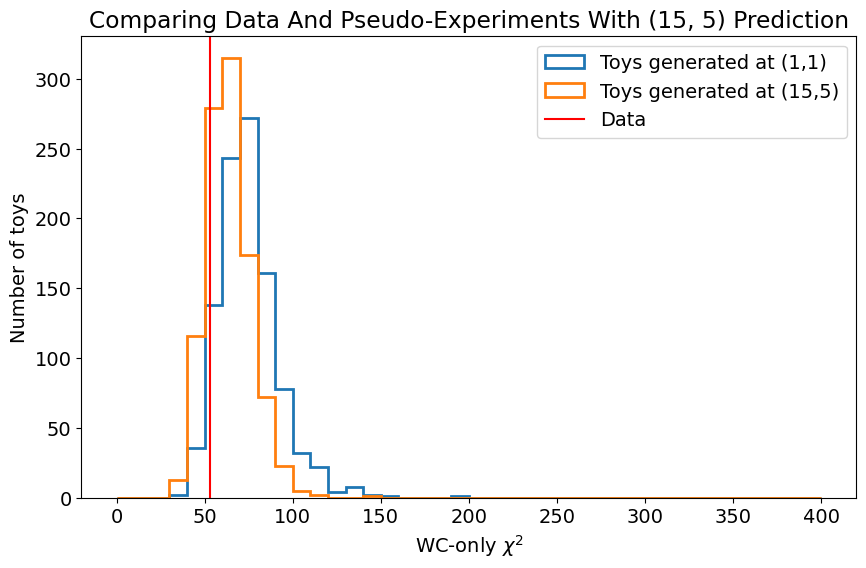

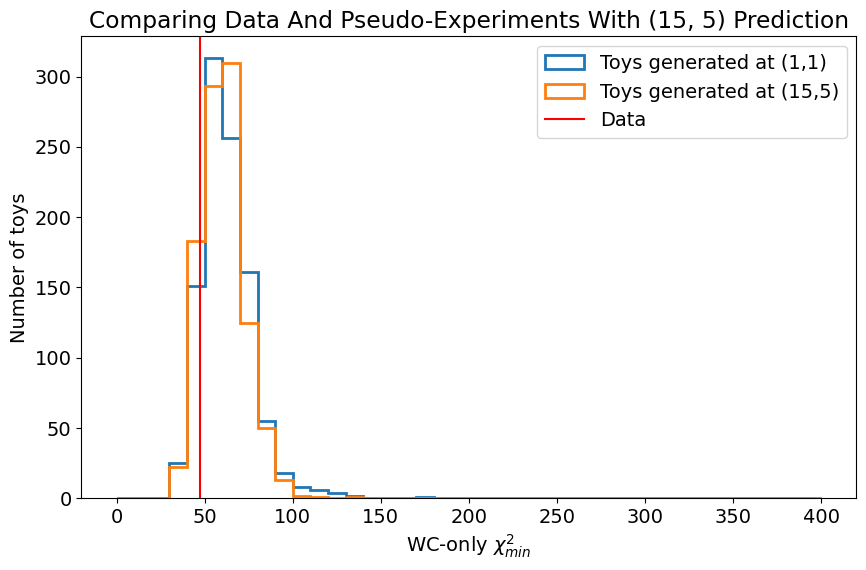

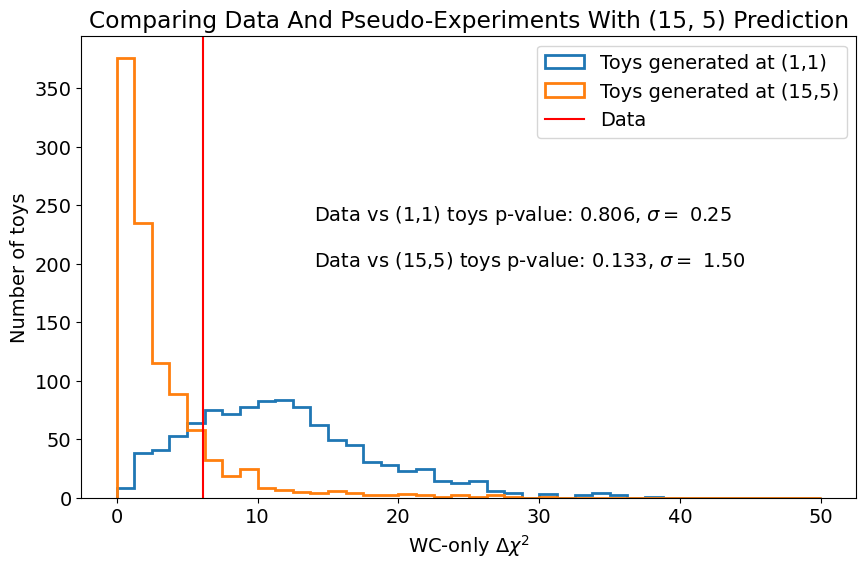

In [10]:
bins = np.linspace(0, 400, 41)

plt.rcParams.update({'font.size': 14})
lw = 2

plt.figure(figsize=(10, 6))
plt.hist(toy_1_1_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(toy_15_5_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(data_15_5_chi2_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(toy_1_1_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(toy_15_5_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(data_15_5_chi2_min_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2_{min}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

bins = np.linspace(0, 50, 41)

plt.figure(figsize=(10, 6))
plt.hist(toy_1_1_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(toy_15_5_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(data_15_5_dchi2_value, color='r', label='Data')

plt.text(0.3, 0.6, rf"Data vs (1,1) toys p-value: {data_1_1_dchi2_pval:.3f}, $\sigma=$ {get_significance(data_1_1_dchi2_pval):.2f}", transform=plt.gca().transAxes)
plt.text(0.3, 0.5, f"Data vs (15,5) toys p-value: {data_15_5_dchi2_pval:.3f}, $\sigma=$ {get_significance(data_15_5_dchi2_pval):.2f}", transform=plt.gca().transAxes)

plt.legend()
plt.xlabel(r'WC-only $\Delta \chi^2$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

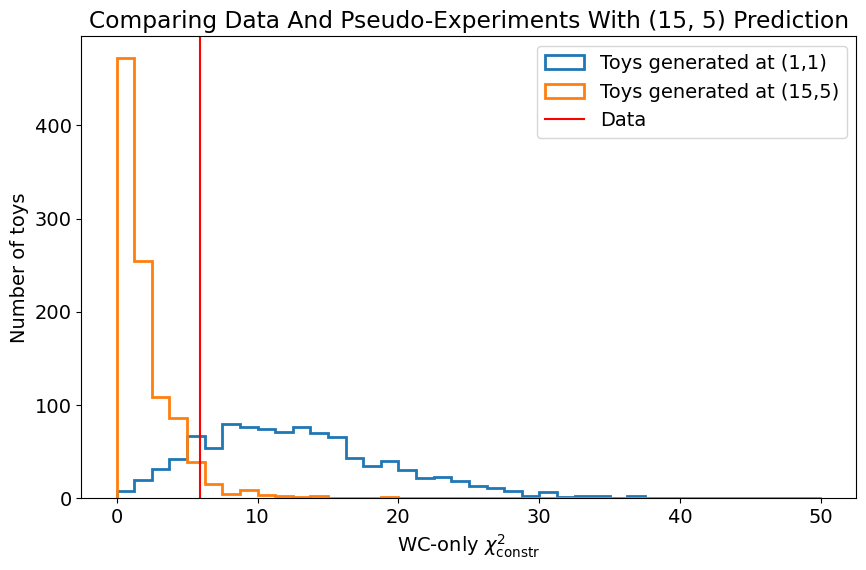

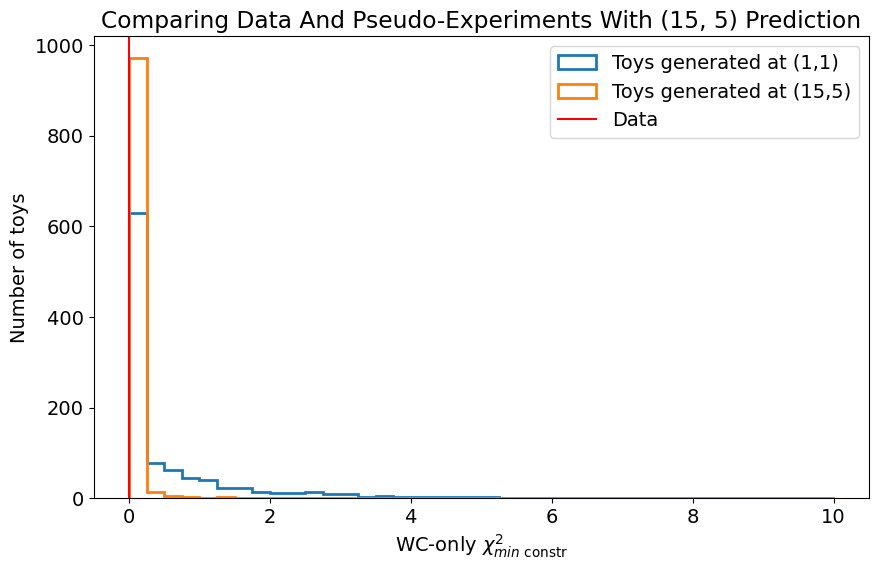

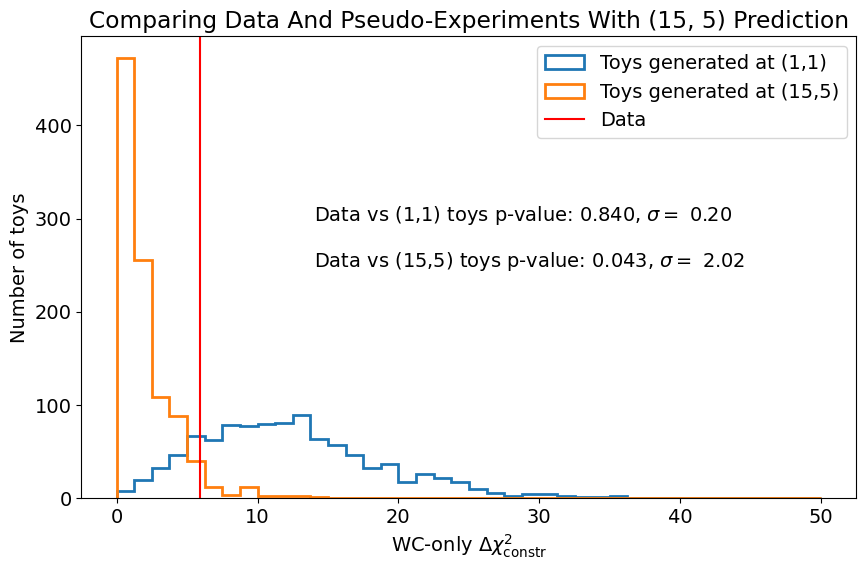

In [11]:
bins = np.linspace(0, 50, 41)

plt.rcParams.update({'font.size': 14})
lw = 2

plt.figure(figsize=(10, 6))
plt.hist(constr_toy_1_1_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(constr_toy_15_5_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(constr_data_15_5_chi2_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2_\mathrm{constr}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

bins = np.linspace(0, 10, 41)

plt.figure(figsize=(10, 6))
plt.hist(constr_toy_1_1_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(constr_toy_15_5_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(constr_data_15_5_chi2_min_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2_{min\ \mathrm{constr}}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

bins = np.linspace(0, 50, 41)

plt.figure(figsize=(10, 6))
plt.hist(constr_toy_1_1_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(constr_toy_15_5_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(constr_data_15_5_dchi2_value, color='r', label='Data')

plt.text(0.3, 0.6, rf"Data vs (1,1) toys p-value: {constr_data_1_1_dchi2_pval:.3f}, $\sigma=$ {get_significance(constr_data_1_1_dchi2_pval):.2f}", transform=plt.gca().transAxes)
plt.text(0.3, 0.5, f"Data vs (15,5) toys p-value: {constr_data_15_5_dchi2_pval:.3f}, $\sigma=$ {get_significance(constr_data_15_5_dchi2_pval):.2f}", transform=plt.gca().transAxes)

plt.legend()
plt.xlabel(r'WC-only $\Delta \chi^2_\mathrm{constr}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()


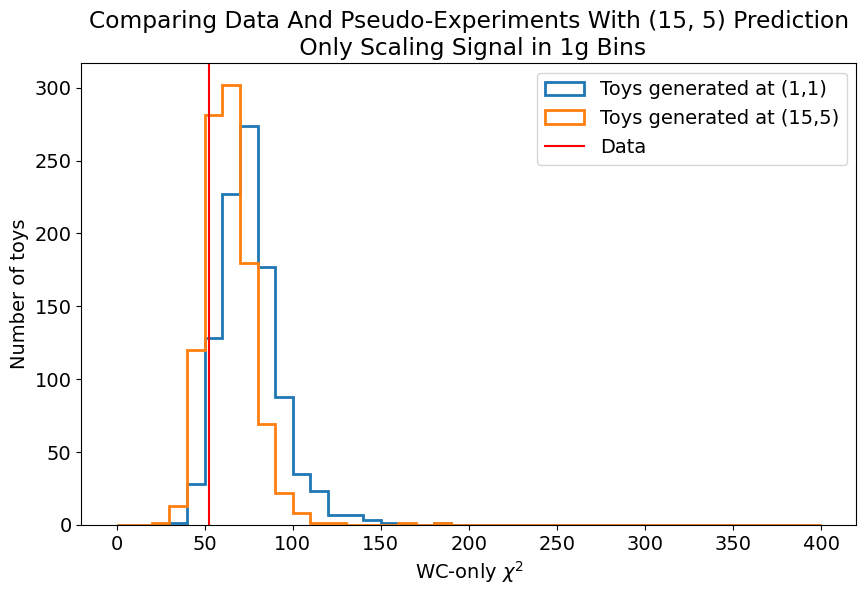

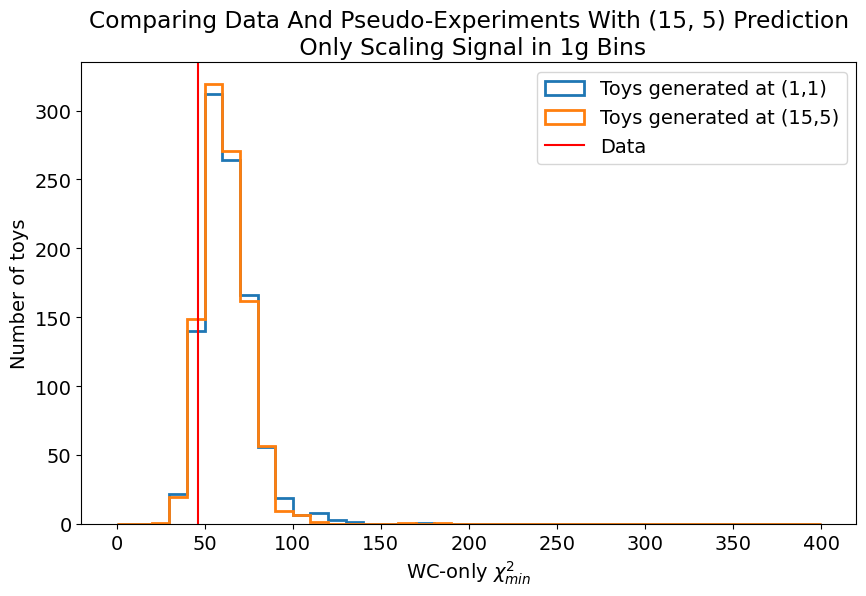

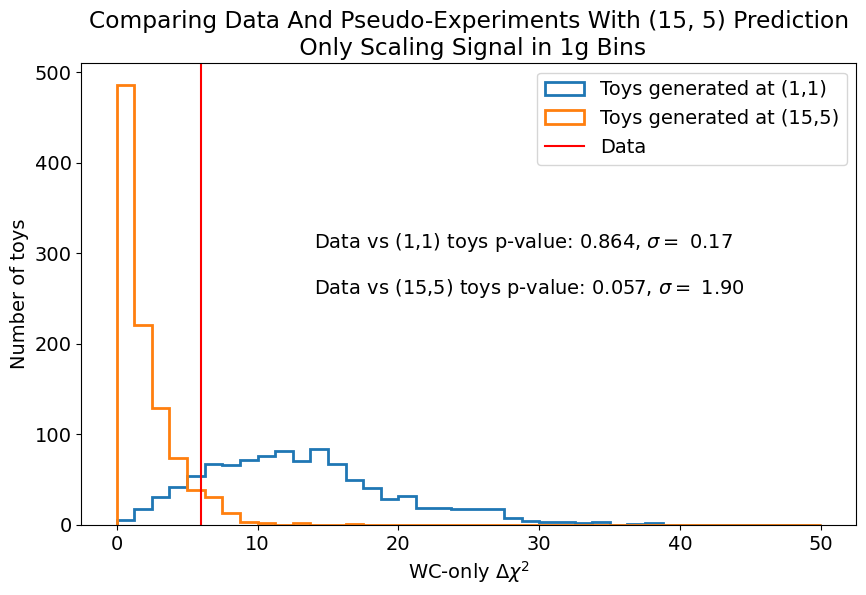

In [12]:
bins = np.linspace(0, 400, 41)

plt.rcParams.update({'font.size': 14})
lw = 2

plt.figure(figsize=(10, 6))
plt.hist(sig_only_toy_1_1_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(sig_only_toy_15_5_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(sig_only_data_15_5_chi2_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction\n Only Scaling Signal in 1g Bins")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(sig_only_toy_1_1_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(sig_only_toy_15_5_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(sig_only_data_15_5_chi2_min_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2_{min}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction\n Only Scaling Signal in 1g Bins")
plt.show()

bins = np.linspace(0, 50, 41)

plt.figure(figsize=(10, 6))
plt.hist(sig_only_toy_1_1_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(sig_only_toy_15_5_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(sig_only_data_15_5_dchi2_value, color='r', label='Data')

plt.text(0.3, 0.6, rf"Data vs (1,1) toys p-value: {sig_only_data_1_1_dchi2_pval:.3f}, $\sigma=$ {get_significance(sig_only_data_1_1_dchi2_pval):.2f}", transform=plt.gca().transAxes)
plt.text(0.3, 0.5, f"Data vs (15,5) toys p-value: {sig_only_data_15_5_dchi2_pval:.3f}, $\sigma=$ {get_significance(sig_only_data_15_5_dchi2_pval):.2f}", transform=plt.gca().transAxes)

plt.legend()
plt.xlabel(r'WC-only $\Delta \chi^2$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction\n Only Scaling Signal in 1g Bins")
plt.show()

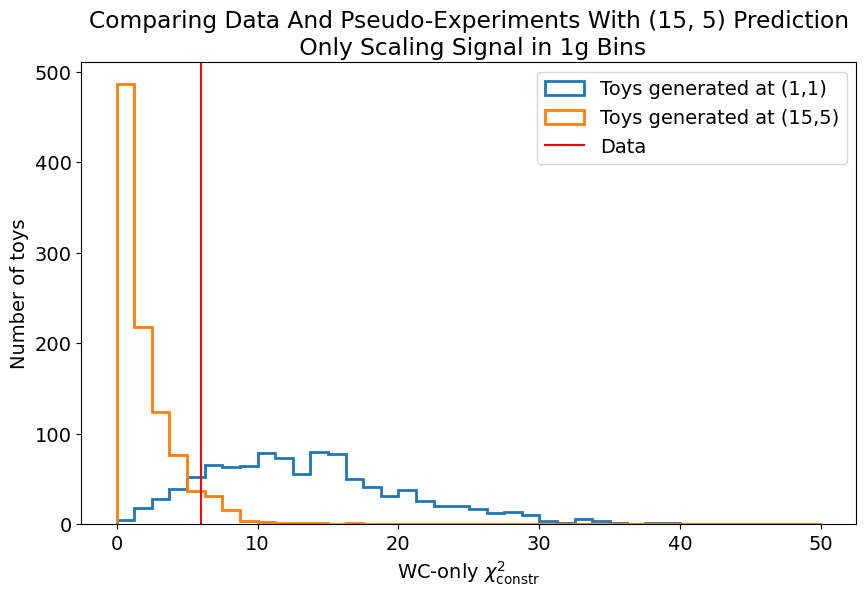

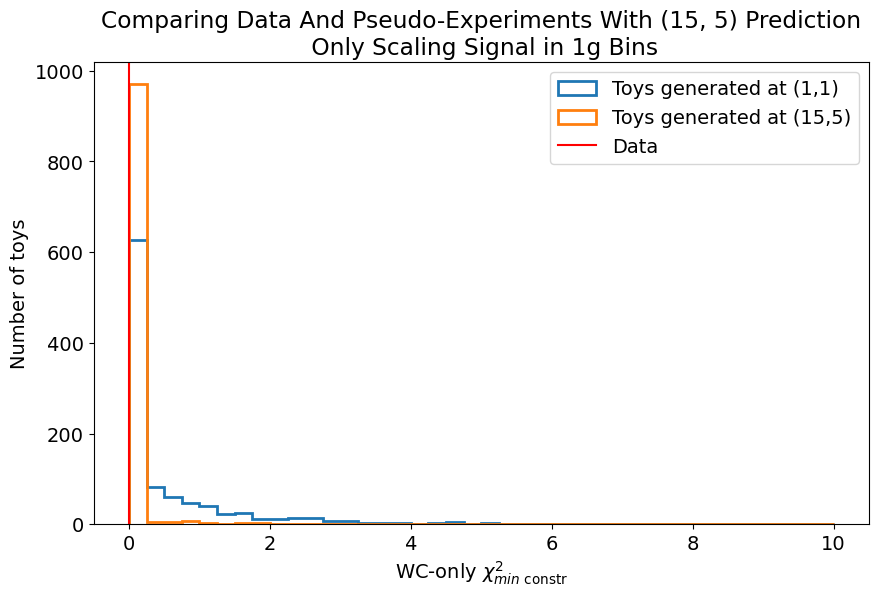

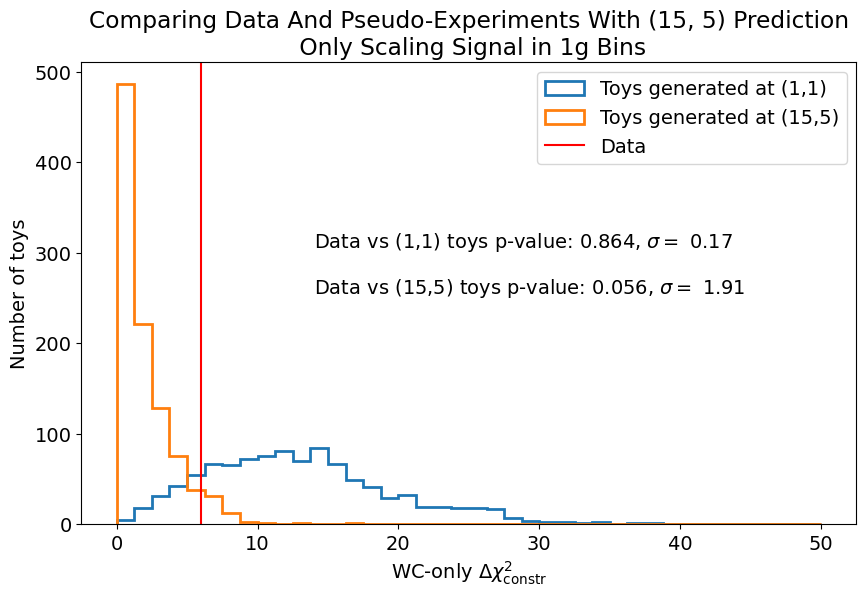

In [13]:
bins = np.linspace(0, 50, 41)

plt.rcParams.update({'font.size': 14})
lw = 2

plt.figure(figsize=(10, 6))
plt.hist(sig_only_constr_toy_1_1_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(sig_only_constr_toy_15_5_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(sig_only_constr_data_15_5_chi2_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2_\mathrm{constr}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction\n Only Scaling Signal in 1g Bins")
plt.show()

bins = np.linspace(0, 10, 41)

plt.figure(figsize=(10, 6))
plt.hist(sig_only_constr_toy_1_1_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(sig_only_constr_toy_15_5_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(sig_only_constr_data_15_5_chi2_min_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'WC-only $\chi^2_{min\ \mathrm{constr}}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction\n Only Scaling Signal in 1g Bins")
plt.show()

bins = np.linspace(0, 50, 41)

plt.figure(figsize=(10, 6))
plt.hist(sig_only_constr_toy_1_1_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(sig_only_constr_toy_15_5_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(sig_only_constr_data_15_5_dchi2_value, color='r', label='Data')

plt.text(0.3, 0.6, rf"Data vs (1,1) toys p-value: {sig_only_constr_data_1_1_dchi2_pval:.3f}, $\sigma=$ {get_significance(sig_only_constr_data_1_1_dchi2_pval):.2f}", transform=plt.gca().transAxes)
plt.text(0.3, 0.5, f"Data vs (15,5) toys p-value: {sig_only_constr_data_15_5_dchi2_pval:.3f}, $\sigma=$ {get_significance(sig_only_constr_data_15_5_dchi2_pval):.2f}", transform=plt.gca().transAxes)

plt.legend()
plt.xlabel(r'WC-only $\Delta \chi^2_\mathrm{constr}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction\n Only Scaling Signal in 1g Bins")
plt.show()


# Chi2 Maps

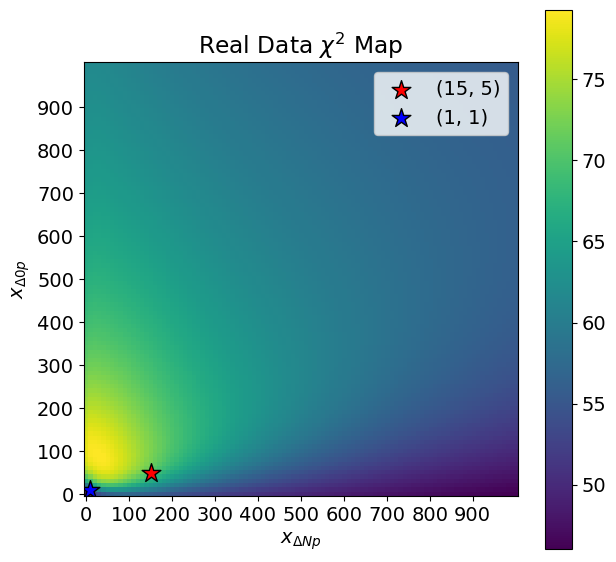

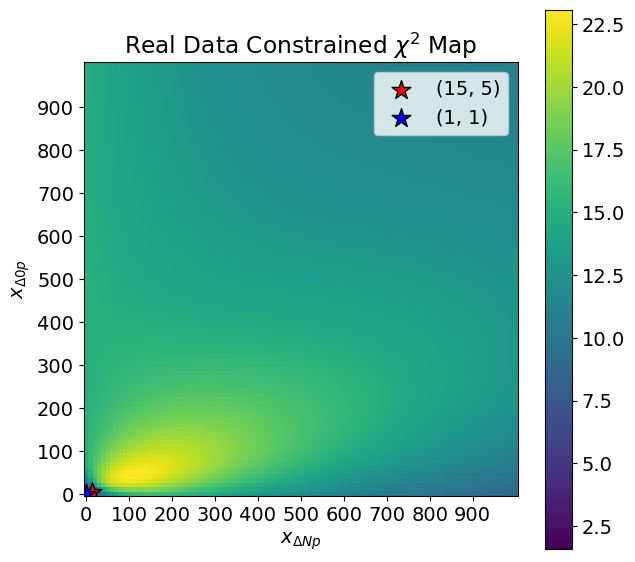

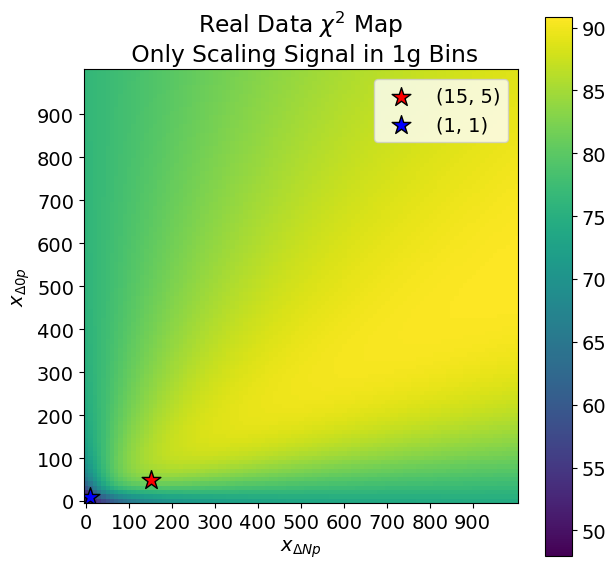

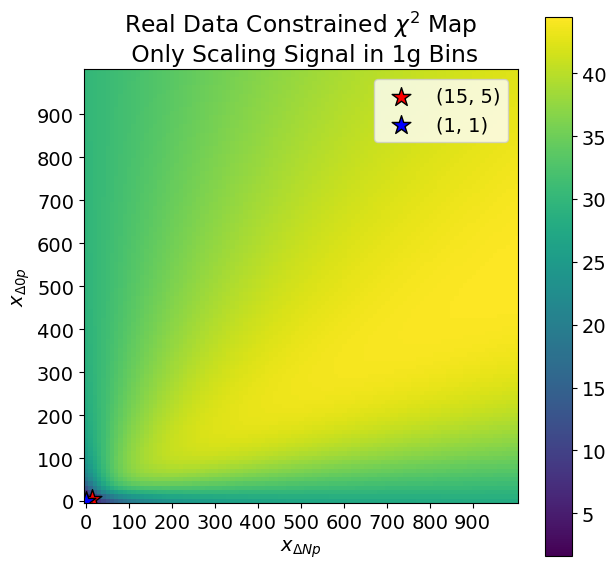

In [14]:
with open("../TLee_Np0p/joint_data_chi2_map.txt") as f:
    lines = f.readlines()
chi2_map = np.zeros((101, 101))
for line in lines:
    i = int(line.split(",")[0][1:].strip()) // 10
    j = int(line.split(":")[0].split(",")[1][:-2].strip()) // 10
    chi2 = float(line.split(":")[1].strip())
    chi2_map[i, j] = chi2
chi2_map = chi2_map.T
plt.figure(figsize=(7, 7))
plt.imshow(chi2_map, origin='lower')
plt.colorbar()
plt.scatter(15, 5, c="r", label="(15, 5)", marker="*", s=200, edgecolors="k")
plt.scatter(1, 1, c="b", label="(1, 1)", marker="*", s=200, edgecolors="k")
plt.xticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))
plt.yticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))
plt.legend()
plt.xlabel(r"$x_{\Delta N p}$")
plt.ylabel(r"$x_{\Delta 0 p}$")
plt.title(r"Real Data $\chi^2$ Map")
plt.show()

with open("../TLee_Np0p/constr_data_chi2_map.txt") as f:
    lines = f.readlines()
chi2_map = np.zeros((101, 101))
for i, line in enumerate(lines):
    i = int(line.split(",")[0][1:].strip()) // 10
    j = int(line.split(":")[0].split(",")[1][:-2].strip()) // 10
    chi2 = float(line.split(":")[1].strip())
    chi2_map[i, j] = chi2
chi2_map = chi2_map.T
plt.figure(figsize=(7, 7))
plt.imshow(chi2_map, origin='lower')
plt.colorbar()
plt.scatter(15/10, 5/10, c="r", label="(15, 5)", marker="*", s=200, edgecolors="k")
plt.scatter(1/10, 1/10, c="b", label="(1, 1)", marker="*", s=200, edgecolors="k")
plt.xticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))
plt.yticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))
plt.legend()
plt.xlabel(r"$x_{\Delta N p}$")
plt.ylabel(r"$x_{\Delta 0 p}$")
plt.title(r"Real Data Constrained $\chi^2$ Map")
plt.show()


with open("../TLee_Np0p/joint_sig_only_data_chi2_map.txt") as f:
    lines = f.readlines()
chi2_map = np.zeros((101, 101))
for i, line in enumerate(lines):
    i = int(line.split(",")[0][1:].strip()) // 10
    j = int(line.split(":")[0].split(",")[1][:-2].strip()) // 10
    chi2 = float(line.split(":")[1].strip())
    chi2_map[i, j] = chi2
chi2_map = chi2_map.T
plt.figure(figsize=(7, 7))
plt.imshow(chi2_map, origin='lower')
plt.colorbar()
plt.scatter(15, 5, c="r", label="(15, 5)", marker="*", s=200, edgecolors="k")
plt.scatter(1, 1, c="b", label="(1, 1)", marker="*", s=200, edgecolors="k")
plt.xticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))
plt.yticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))
plt.legend()
plt.xlabel(r"$x_{\Delta N p}$")
plt.ylabel(r"$x_{\Delta 0 p}$")
plt.title(r"Real Data $\chi^2$ Map""\n Only Scaling Signal in 1g Bins")
plt.show()

with open("../TLee_Np0p/constr_sig_only_data_chi2_map.txt") as f:
    lines = f.readlines()
chi2_map = np.zeros((101, 101))
for i, line in enumerate(lines):
    i = int(line.split(",")[0][1:].strip()) // 10
    j = int(line.split(":")[0].split(",")[1][:-2].strip()) // 10
    chi2 = float(line.split(":")[1].strip())
    chi2_map[i, j] = chi2
chi2_map = chi2_map.T
plt.figure(figsize=(7, 7))
plt.imshow(chi2_map, origin='lower')
plt.colorbar()
plt.scatter(15/10, 5/10, c="r", label="(15, 5)", marker="*", s=200, edgecolors="k")
plt.scatter(1/10, 1/10, c="b", label="(1, 1)", marker="*", s=200, edgecolors="k")
plt.xticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))
plt.yticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))
plt.legend()
plt.xlabel(r"$x_{\Delta N p}$")
plt.ylabel(r"$x_{\Delta 0 p}$")
plt.title(r"Real Data Constrained $\chi^2$ Map""\n Only Scaling Signal in 1g Bins")
plt.show()



# Best Fit Points

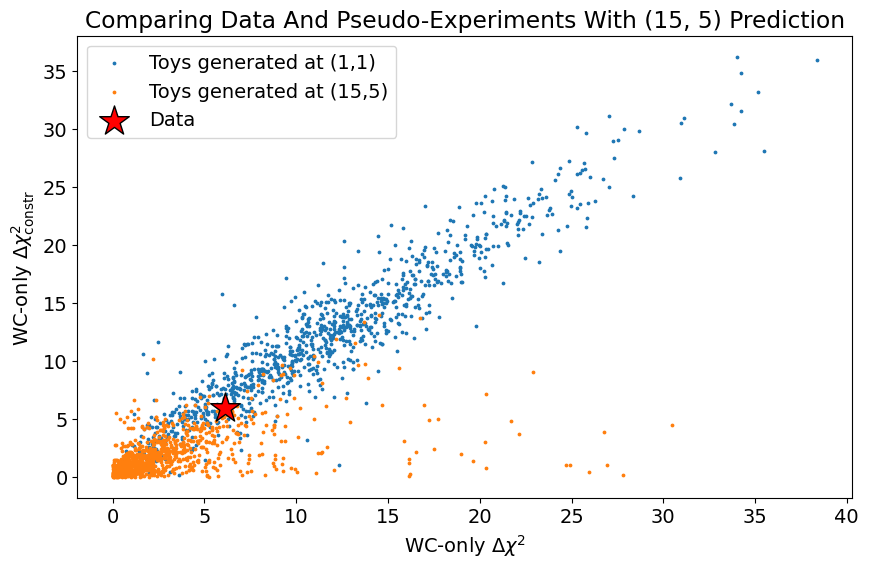

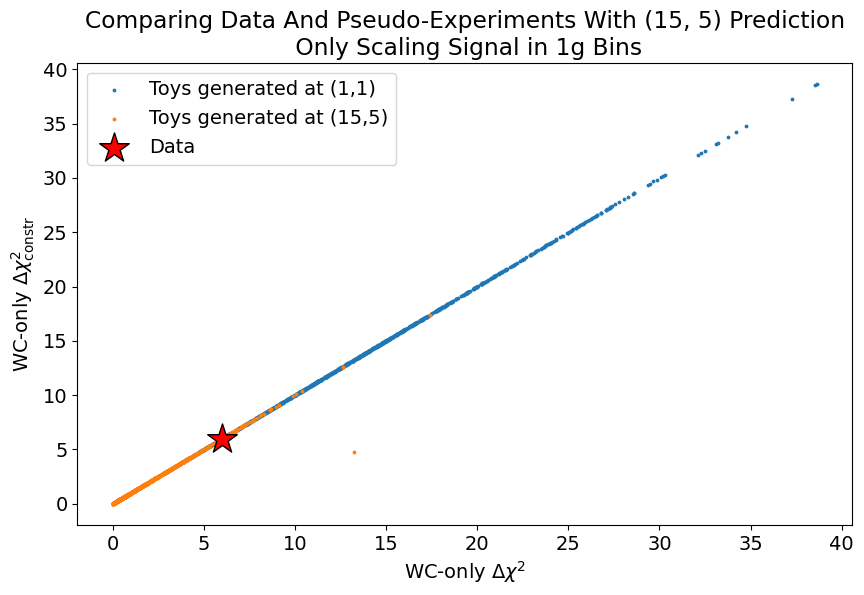

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(toy_1_1_15_5_dchi2_values, constr_toy_1_1_15_5_dchi2_values, label='Toys generated at (1,1)', s=3)
plt.scatter(toy_15_5_15_5_dchi2_values, constr_toy_15_5_15_5_dchi2_values, label="Toys generated at (15,5)", s=3)
plt.scatter(data_15_5_dchi2_value, constr_data_15_5_dchi2_value, color='r', label='Data', marker='*', s=500, edgecolors='k')
plt.legend()
plt.xlabel(r'WC-only $\Delta \chi^2$')
plt.ylabel(r'WC-only $\Delta \chi^2_{\mathrm{constr}}$')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(sig_only_toy_1_1_15_5_dchi2_values, sig_only_constr_toy_1_1_15_5_dchi2_values, label='Toys generated at (1,1)', s=3)
plt.scatter(sig_only_toy_15_5_15_5_dchi2_values, sig_only_constr_toy_15_5_15_5_dchi2_values, label="Toys generated at (15,5)", s=3)
plt.scatter(sig_only_data_15_5_dchi2_value, sig_only_constr_data_15_5_dchi2_value, color='r', label='Data', marker='*', s=500, edgecolors='k')
plt.legend()
plt.xlabel(r'WC-only $\Delta \chi^2$')
plt.ylabel(r'WC-only $\Delta \chi^2_{\mathrm{constr}}$')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction\n Only Scaling Signal in 1g Bins")
plt.show()




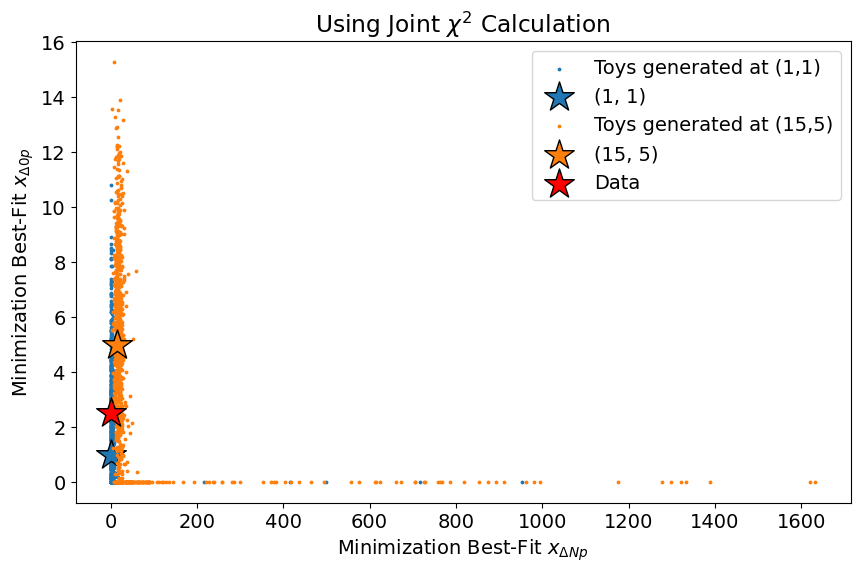

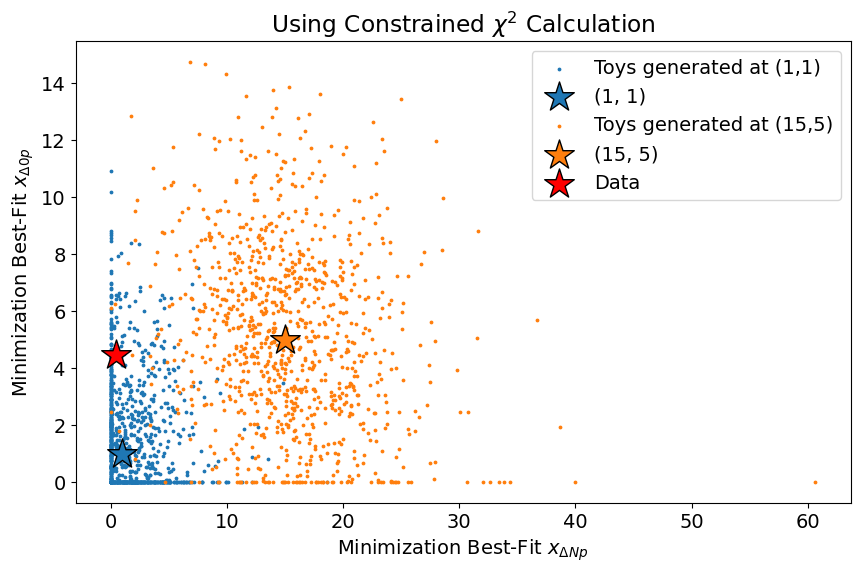

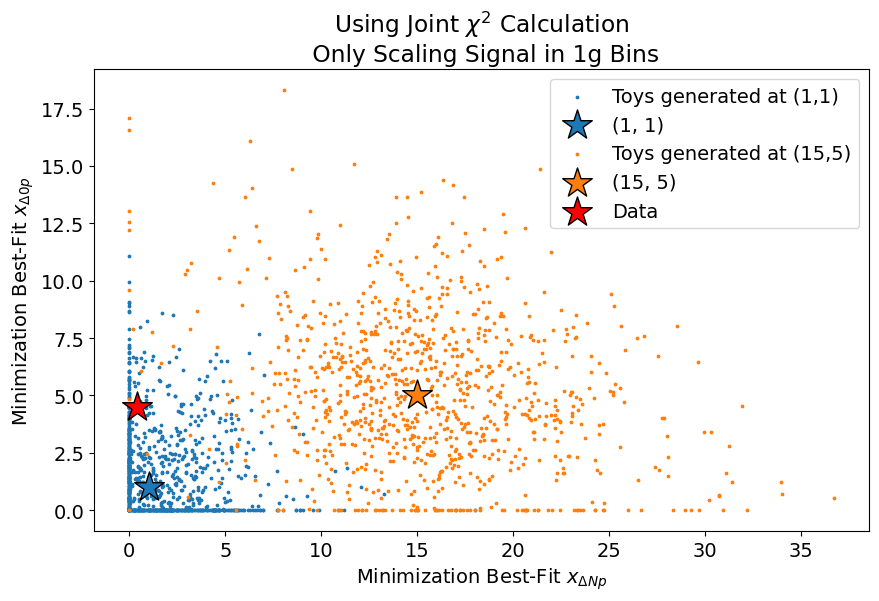

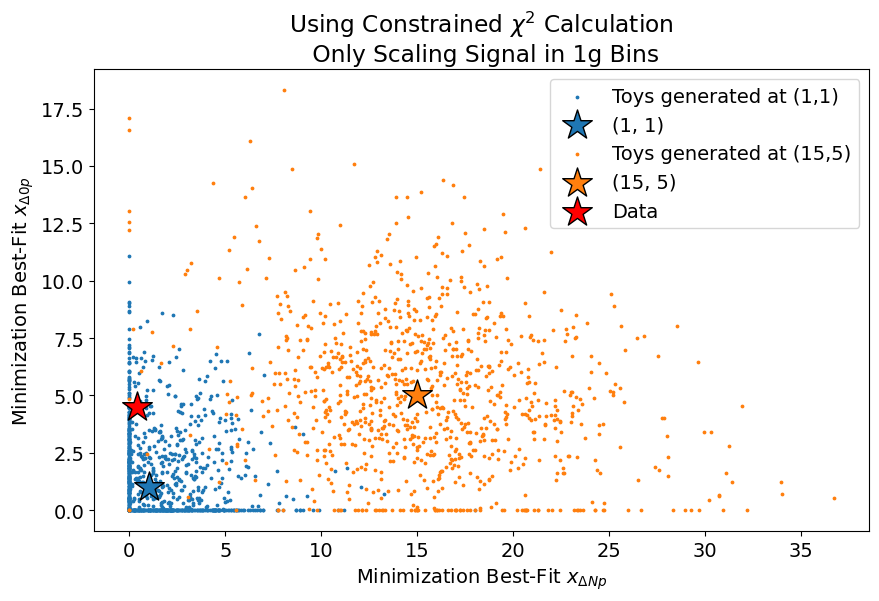

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(toy_1_1_15_5_min_Np_points, toy_1_1_15_5_min_0p_points, label='Toys generated at (1,1)', s=3)
plt.scatter(1, 1, color='tab:blue', label='(1, 1)', marker='*', s=500, edgecolors='k')
plt.scatter(toy_15_5_15_5_min_Np_points, toy_15_5_15_5_min_0p_points, label="Toys generated at (15,5)", s=3)
plt.scatter(15, 5, color='tab:orange', label='(15, 5)', marker='*', s=500, edgecolors='k')
plt.scatter(data_15_5_min_Np_point, data_15_5_min_0p_point, color='r', label='Data', marker='*', s=500, edgecolors='k')
plt.legend()
plt.xlabel(r'Minimization Best-Fit $x_{\Delta Np}$')
plt.ylabel(r'Minimization Best-Fit $x_{\Delta 0p}$')
plt.title(r"Using Joint $\chi^2$ Calculation")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(constr_toy_1_1_15_5_min_Np_points, constr_toy_1_1_15_5_min_0p_points, label='Toys generated at (1,1)', s=3)
plt.scatter(1, 1, color='tab:blue', label='(1, 1)', marker='*', s=500, edgecolors='k')
plt.scatter(constr_toy_15_5_15_5_min_Np_points, constr_toy_15_5_15_5_min_0p_points, label="Toys generated at (15,5)", s=3)
plt.scatter(15, 5, color='tab:orange', label='(15, 5)', marker='*', s=500, edgecolors='k')
plt.scatter(constr_data_15_5_min_Np_point, constr_data_15_5_min_0p_point, color='r', label='Data', marker='*', s=500, edgecolors='k')
plt.legend()
plt.xlabel(r'Minimization Best-Fit $x_{\Delta Np}$')
plt.ylabel(r'Minimization Best-Fit $x_{\Delta 0p}$')
plt.title(r"Using Constrained $\chi^2$ Calculation")
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(sig_only_toy_1_1_15_5_min_Np_points, sig_only_toy_1_1_15_5_min_0p_points, label='Toys generated at (1,1)', s=3)
plt.scatter(1, 1, color='tab:blue', label='(1, 1)', marker='*', s=500, edgecolors='k')
plt.scatter(sig_only_toy_15_5_15_5_min_Np_points, sig_only_toy_15_5_15_5_min_0p_points, label="Toys generated at (15,5)", s=3)
plt.scatter(15, 5, color='tab:orange', label='(15, 5)', marker='*', s=500, edgecolors='k')
plt.scatter(sig_only_data_15_5_min_Np_point, sig_only_data_15_5_min_0p_point, color='r', label='Data', marker='*', s=500, edgecolors='k')
plt.legend()
plt.xlabel(r'Minimization Best-Fit $x_{\Delta Np}$')
plt.ylabel(r'Minimization Best-Fit $x_{\Delta 0p}$')
plt.title(r"Using Joint $\chi^2$ Calculation""\n Only Scaling Signal in 1g Bins")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(sig_only_constr_toy_1_1_15_5_min_Np_points, sig_only_constr_toy_1_1_15_5_min_0p_points, label='Toys generated at (1,1)', s=3)
plt.scatter(1, 1, color='tab:blue', label='(1, 1)', marker='*', s=500, edgecolors='k')
plt.scatter(sig_only_constr_toy_15_5_15_5_min_Np_points, sig_only_constr_toy_15_5_15_5_min_0p_points, label="Toys generated at (15,5)", s=3)
plt.scatter(15, 5, color='tab:orange', label='(15, 5)', marker='*', s=500, edgecolors='k')
plt.scatter(sig_only_constr_data_15_5_min_Np_point, sig_only_constr_data_15_5_min_0p_point, color='r', label='Data', marker='*', s=500, edgecolors='k')
plt.legend()
plt.xlabel(r'Minimization Best-Fit $x_{\Delta Np}$')
plt.ylabel(r'Minimization Best-Fit $x_{\Delta 0p}$')
plt.title(r"Using Constrained $\chi^2$ Calculation""\n Only Scaling Signal in 1g Bins")
plt.show()


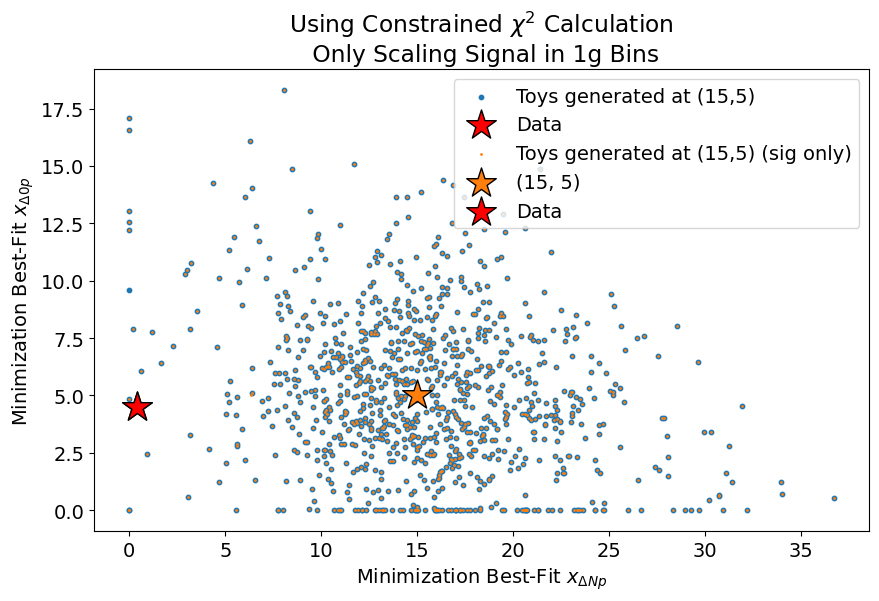

In [17]:
s=1
plt.figure(figsize=(10, 6))
plt.scatter(sig_only_toy_15_5_15_5_min_Np_points, sig_only_toy_15_5_15_5_min_0p_points, label="Toys generated at (15,5)", s=10*s)
plt.scatter(sig_only_data_15_5_min_Np_point, sig_only_data_15_5_min_0p_point, color='r', label='Data', marker='*', s=500, edgecolors='k')
plt.scatter(sig_only_constr_toy_15_5_15_5_min_Np_points, sig_only_constr_toy_15_5_15_5_min_0p_points, label="Toys generated at (15,5) (sig only)", s=s)
plt.scatter(15, 5, color='tab:orange', label='(15, 5)', marker='*', s=500, edgecolors='k')
plt.scatter(sig_only_constr_data_15_5_min_Np_point, sig_only_constr_data_15_5_min_0p_point, color='r', label='Data', marker='*', s=500, edgecolors='k')
plt.legend()
plt.xlabel(r'Minimization Best-Fit $x_{\Delta Np}$')
plt.ylabel(r'Minimization Best-Fit $x_{\Delta 0p}$')
plt.title(r"Using Constrained $\chi^2$ Calculation""\n Only Scaling Signal in 1g Bins")
plt.show()